## **1. Degree Distribution of Erdős-Rényi networks**

#### The Erdős-Rényi (ER) model is a model for generating random networks where $N$ nodes are randomly connected such that the probability that a pair of nodes is linked is $p$. In this exercise,we are going to study the degree distribution of an ER network.

#### **a) Create an instance of the ER network with $N = 1000$ nodes and $p = 0.01$ and visualize it**                
In most cases, you should get a connected network. However, there is a chance that the generated network is not connected. In this case, run the code again until you get a connected network.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.special
from scipy.special import factorial
from scipy.stats import poisson
import random

rng = np.random.default_rng(238842)

Text(0.5, 1.0, 'Erdős-Rényi Random Graph ($N=1000$, $p=0.01$)')

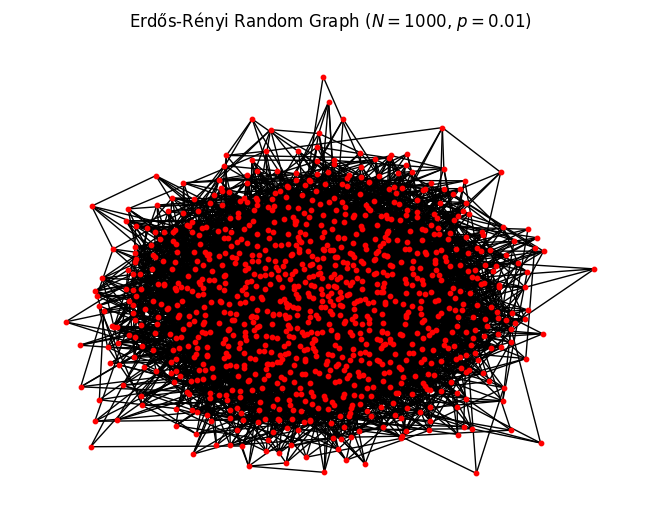

In [2]:
N = 1000
p = 0.01

#check if the graph is connected
connected = False
while not connected:
    G = nx.fast_gnp_random_graph(N, p)
    connected = nx.is_connected(G)

# Visualize the network
nx.draw(G, with_labels=False, node_size=10, node_color = "red")
plt.title("Erdős-Rényi Random Graph ($N=1000$, $p=0.01$)")

#### **b) Plot the degree distribution of the generated ER network. First, get the histogram of the degree and normalize it to transform it into a probability mass function**

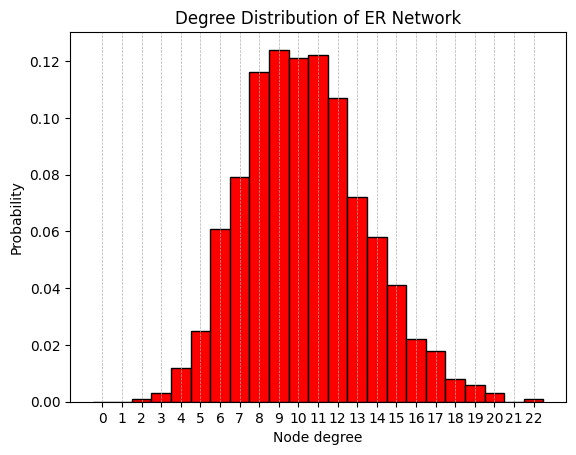

In [3]:
# Get the degree of each node
degrees = [degree for _, degree in G.degree()]
max_degree = max(degrees)

# Create a histogram of the degree distribution
hist, bins = np.histogram(degrees, bins=range(max(degrees) + 2), density=True)

# Plot the degree distribution as a probability mass function (PMF)
plt.bar(bins[:-1], hist, width=1.0, align="center", color = "red", edgecolor = "black")
plt.xlabel("Node degree")
plt.ylabel("Probability")
plt.title("Degree Distribution of ER Network")
plt.grid(axis='x', which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(max_degree + 1))
plt.show()

### c) **Plot the Poisson distribution expected for an ER network and the degree distribution of the realized ER network in one plot.**

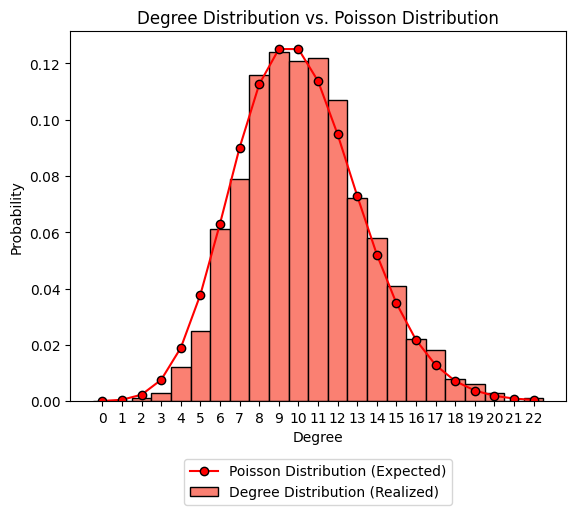

In [4]:
# Calculate the Poisson distribution expected for an ER network
lambda_poisson = N * p
x_poisson = np.arange(0, max(degrees) + 1)
poisson_pmf = (np.exp(-lambda_poisson) * (lambda_poisson ** x_poisson)) / factorial(x_poisson)

# Plot the degree distribution
plt.bar(bins[:-1], hist, width=1.0, align="center", color="salmon", edgecolor="black", label="Degree Distribution (Realized)")

# Plot the Poisson distribution
plt.plot(x_poisson, poisson_pmf, marker='o', linestyle='-', color='red', markeredgecolor='black', label="Poisson Distribution (Expected)")

plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution vs. Poisson Distribution")
plt.xticks(range(max_degree + 1))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3))
plt.show()

## **3. Implementing the Watts-Strogatz model**
#### **a) Implement the WS model and generate a network using two different sets of parameters:                     $N = 30$, $m = 2$, $p = 0.2$, and       $N = 80$, $m = 2$, $p  = 0.4$.  Visualize the networks using a circular layout algorithm (nx.draw_circular(G)), and check that the networks look right**

In [5]:
#each node on the ring connects to m nearest neighbors to the left and m nearest neighbors to the right
def ring(n, m, print_neigh):
    """
    This function creates the basic ring (to be rewired) with n nodes in which
    each node is connected to m nodes on the left and right.


    Parameters
    ----------
    n : int
        number of nodes
    m : int
        number of neighbors to connect left and right (so the degree is 2*m)

    Returns
    -------
    G : networkx graph
        The basic ring graph
    """

    G = nx.Graph()
    G.add_nodes_from(range(n))
    for node in range(n):
      if print_neigh == True:
        print("\nNODE: ", node)
      for neighbor in range(node + 1, node + m + 1):
        if print_neigh == True:
          print("neighbor", neighbor)
        G.add_edge(node, neighbor % n)
    return G


NODE:  0
neighbor 1
neighbor 2

NODE:  1
neighbor 2
neighbor 3

NODE:  2
neighbor 3
neighbor 4

NODE:  3
neighbor 4
neighbor 5

NODE:  4
neighbor 5
neighbor 6

NODE:  5
neighbor 6
neighbor 7

NODE:  6
neighbor 7
neighbor 8

NODE:  7
neighbor 8
neighbor 9

NODE:  8
neighbor 9
neighbor 10

NODE:  9
neighbor 10
neighbor 11


Text(0.5, 1.0, 'Basic ring with 10 nodes')

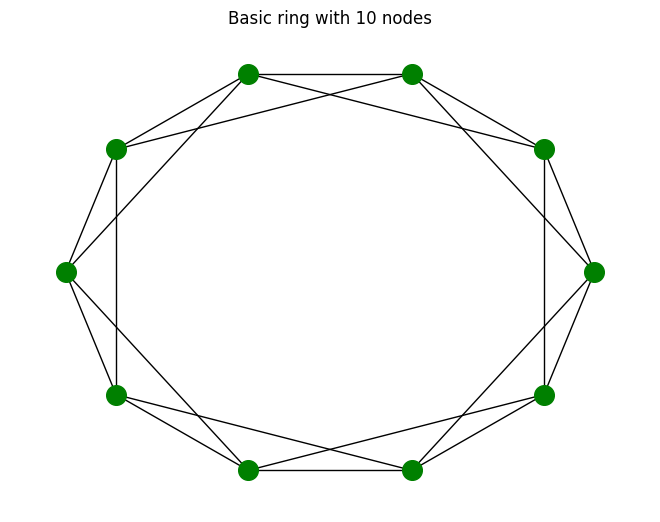

In [6]:
#check the neighbors of each node
R = ring(10, 2, True)
nx.draw_circular(R, with_labels=False, node_size=200, node_color = "green")
plt.title("Basic ring with 10 nodes")

In [7]:
def ws(n, m, p, should_print):
    """
    This function calls the ring() function to make a basic ring and then
    rewires each link with a probability p and also prints the total number of
    links and the number of rewired links.
    Note self-loops are not allowed when rewiring, and duplicate edges are avoided.

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right
    p : float
        Rewiring probability

    Returns
    -------
    network : graph
        The Watts-Strogatz small-world network

    """
    network = ring(n, m, False)
    all_edges = list(network.edges())  # Create a copy of all edges

    rewired_num = 0  # Tracks the number of rewired links
    total_num = len(all_edges)  # Tracks the total number of links in the network

    for u, v in all_edges:
        if np.random.rand() < p:
            rewired_num += 1
            # Rewire the edge
            new_v = u  # Initialize a variable for the new endpoint
            while new_v == u or network.has_edge(u, new_v):
                # Continue choosing a new endpoint until it's not a self-loop
                # and doesn't create a duplicate edge
                new_v = random.choice(range(n))

            network.remove_edge(u, v)
            network.add_edge(u, new_v)

    if should_print == True:
      print("total number of links:")
      print(total_num)
      print("number of rewired links:")
      print(rewired_num)

    return network


total number of links:
60
number of rewired links:
9


Text(0.5, 1.0, 'WS model with $N = 30$, $m=2$ and $p=0.2$')

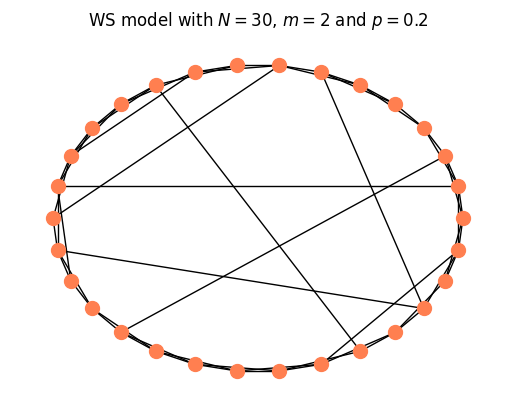

In [8]:
WS_1 = ws(n=30, m=2, p=0.2, should_print = True)
fig = plt.figure()
ax = fig.add_subplot(111)
nx.draw_circular(WS_1, with_labels=False, node_size=100, node_color = "coral")
plt.title("WS model with $N = 30$, $m=2$ and $p=0.2$")

In [9]:
def ws_rewired(n, m, p):
    """
    This function is used for the following histogram of the distribution of the rewired links

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right
    p : float
        Rewiring probability

    Returns
    -------
    network : graph
        The Watts-Strogatz small-world network

    """
    network = ring(n, m, False)
    all_edges = list(network.edges())  # Create a copy of all edges

    rewired_num = 0  # Tracks the number of rewired links
    total_num = len(all_edges)  # Tracks the total number of links in the network

    for u, v in all_edges:
        if np.random.rand() < p:
            rewired_num += 1
            # Rewire the edge
            new_v = u  # Initialize a variable for the new endpoint
            while new_v == u or network.has_edge(u, new_v):
                # Continue choosing a new endpoint until it's not a self-loop
                # and doesn't create a duplicate edge
                new_v = random.choice(range(n))

            network.remove_edge(u, v)
            network.add_edge(u, new_v)


    return rewired_num


In [10]:
rewired_nums = []
for _ in range(5001):
  rewired_num = ws_rewired(30,2,0.2)
  rewired_nums.append(rewired_num)

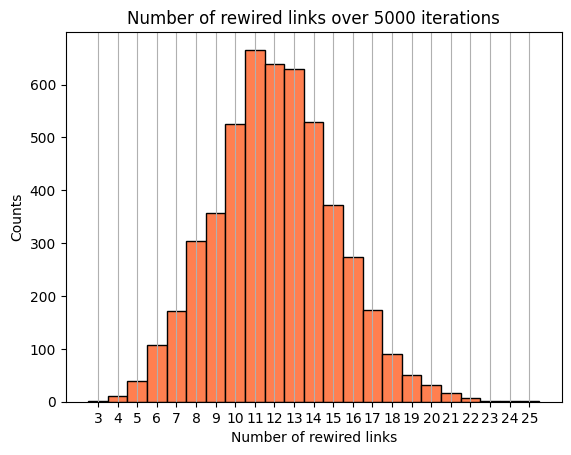

In [11]:
# Calculate the minimum and maximum values in the list for defining bins
min_value = min(rewired_nums)
max_value = max(rewired_nums)

# Create a list of bin edges, spaced by one
bin_edges = list(range(min_value, max_value + 2))

# Create the histogram
plt.hist(rewired_nums, bins=bin_edges, color="coral", edgecolor='black', align='left')

# Label the axes and title
plt.xlabel('Number of rewired links')
plt.ylabel('Counts')
plt.title('Number of rewired links over 5000 iterations')

# Set x-axis ticks spaced by one
plt.xticks(range(min_value, max_value + 1))

# Show the histogram
plt.grid(axis='x', linestyle='-')
plt.show()


total number of links:
160
number of rewired links:
62


Text(0.5, 1.0, 'WS model with $N = 80$, $m=2$ and $p=0.4$')

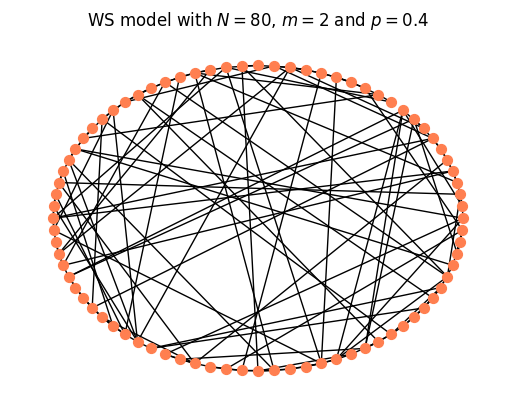

In [12]:
WS_2 = ws(n=80, m=2, p=0.4, should_print = True)
fig = plt.figure()
ax = fig.add_subplot(111)
nx.draw_circular(WS_2, with_labels=False, node_size=50, node_color = "coral")
plt.title("WS model with $N = 80$, $m=2$ and $p=0.4$")

In [13]:
rewired_nums = []
for _ in range(5001):
  rewired_num = ws_rewired(80,2,0.4)
  rewired_nums.append(rewired_num)

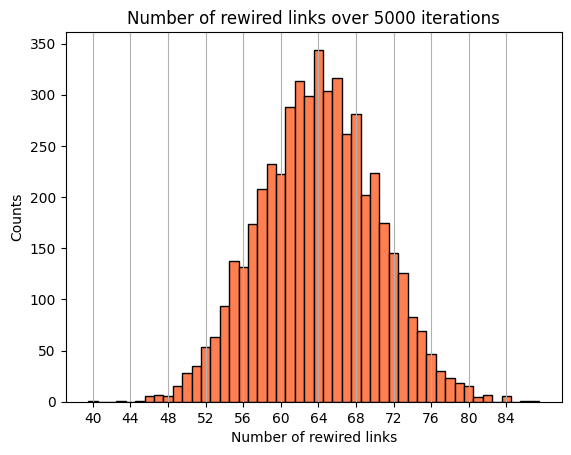

In [49]:
# Calculate the minimum and maximum values in the list for defining bins
min_value = min(rewired_nums)
max_value = max(rewired_nums)

# Create a list of bin edges, spaced by one
bin_edges = list(range(min_value, max_value + 2))

# Create the histogram
plt.hist(rewired_nums, bins=bin_edges, color="coral", edgecolor='black', align='left')

# Label the axes and title
plt.xlabel('Number of rewired links')
plt.ylabel('Counts')
plt.title('Number of rewired links over 5000 iterations')

# Set x-axis ticks spaced by one
plt.xticks(range(min_value, max_value + 1, 4))

# Show the histogram
plt.grid(axis='x', linestyle='-')
plt.show()


#### **Compute, for WS model networks with $N=1000$ and $m=4$, relative clustering coefficient $c(p)/c(p = 0)$ and relative average path length $l(p)/(p = 0)$. Plot them as a function of p for $p = 0.001,..., 1$ in one figure. Use a logarithmic x-axis in your plot.**

In [57]:
# Create a basic ring graph
N = 1000
m = 4
basic_ring = ring(N,m, False)  # p=0 for a regular ring graph

# Calculate average clustering coefficient and average shortest path for the basic ring
c_basic = nx.average_clustering(basic_ring)
l_basic = nx.average_shortest_path_length(basic_ring)

print("Basic Ring:")
print("Average Clustering Coefficient:", c_basic)
print("Average Shortest Path Length:", l_basic)

# Define rewiring probabilities
probabilities = np.logspace(-4, 0, 22)  # 11 values uniformly spaced between 10^-3 and 10^0 on a log scale
relative_c = []  # List to store the relative average clustering coefficient for each rewiring probability
relative_l = []  # List to store the relative average shortest path length for each rewiring probability

for p in probabilities:
    print("\n Rewiring probability:", p)

    # Generate a Watts-Strogatz small-world network with rewiring probability p
    smallworld = ws(N, m, p)

    # Calculate the largest connected component of the network
    largest_component = max(nx.connected_components(smallworld), key=len)
    largest_component = smallworld.subgraph(largest_component)

    # Calculate the relative average clustering coefficient and relative average shortest path length
    c_sw = nx.average_clustering(largest_component) / c_basic
    l_sw = nx.average_shortest_path_length(largest_component) / l_basic

    relative_c.append(c_sw)
    relative_l.append(l_sw)

Basic Ring:
Average Clustering Coefficient: 0.6428571428571448
Average Shortest Path Length: 62.93793793793794

 Rewiring probability: 0.0001
total number of links:
4000
number of rewired links:
0

 Rewiring probability: 0.00015505157798326253
total number of links:
4000
number of rewired links:
1

 Rewiring probability: 0.00024040991835099718
total number of links:
4000
number of rewired links:
0

 Rewiring probability: 0.0003727593720314938
total number of links:
4000
number of rewired links:
0

 Rewiring probability: 0.0005779692884153313
total number of links:
4000
number of rewired links:
1

 Rewiring probability: 0.000896150501946605
total number of links:
4000
number of rewired links:
3

 Rewiring probability: 0.0013894954943731374
total number of links:
4000
number of rewired links:
5

 Rewiring probability: 0.002154434690031882
total number of links:
4000
number of rewired links:
7

 Rewiring probability: 0.0033404849835132443
total number of links:
4000
number of rewired link

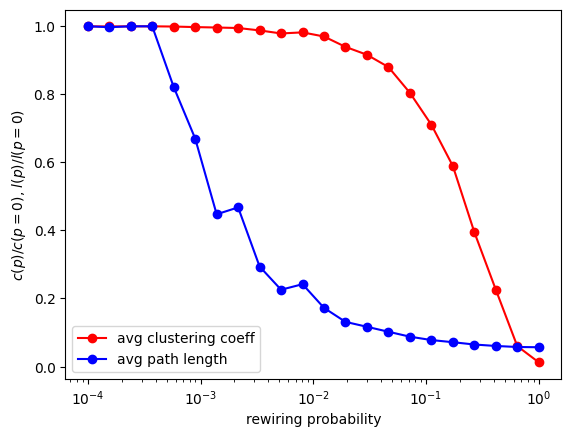

In [58]:
fig_cl, ax_cl = plt.subplots()
ax_cl.plot(probabilities, relative_c, marker='o', ls='-', color='red', label='avg clustering coeff')
ax_cl.plot(probabilities, relative_l, marker='o', ls='-', color='blue', label='avg path length')
ax_cl.set_xscale('log')
ax_cl.set_xlabel('rewiring probability')
ax_cl.set_ylabel(r'$c(p) / c(p=0)$, $l(p) / l(p=0)$')
ax_cl.legend()

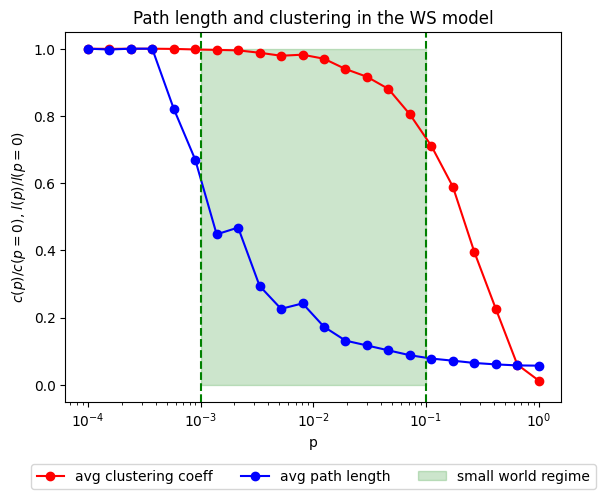

In [69]:
fig_cl, ax_cl = plt.subplots()

# Plot average clustering coefficient and average path length
ax_cl.plot(probabilities, relative_c, marker='o', ls='-', color='red', label='avg clustering coeff')
ax_cl.plot(probabilities, relative_l, marker='o', ls='-', color='blue', label='avg path length')

# Set the x-axis to a logarithmic scale
ax_cl.set_xscale('log')

# Set labels
ax_cl.set_xlabel('p')
ax_cl.set_ylabel(r'$c(p) / c(p=0)$, $l(p) / l(p=0)$')


# Add vertical lines at 10^-3 and 10^-1
ax_cl.axvline(x=1e-3, color='green', linestyle='--')
ax_cl.axvline(x=1e-1, color='green', linestyle='--')

# Fill the area between the lines with green
ax_cl.fill_between([1e-3, 1e-1], 0, 1, color='green', alpha=0.2, label = "small world regime")

ax_cl.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title("Path length and clustering in the WS model")
plt.show()


## **Challenge exercise**
#### **You probably observe that your plots in b) are not exactly the same as the one in the lecture slides. Explain why this is the case. Based on your argument, improve your code and plot again $c(p)/c(p = 0)$ and $l(p)/l(p = 0)$ as a function of p.**

In [82]:
def comparison(iter):

  clusterings = []
  paths = []
  i = 0

  for _ in range(iter+1):
    print("Iteration: ", i+1)
    # Create a basic ring graph
    N = 1000
    m = 4
    basic_ring = ring(N,m, False)  # p=0 for a regular ring graph

    # Calculate average clustering coefficient and average shortest path for the basic ring
    c_basic = nx.average_clustering(basic_ring)
    l_basic = nx.average_shortest_path_length(basic_ring)

    #print("Basic Ring:")
    #print("Average Clustering Coefficient:", c_basic)
    #print("Average Shortest Path Length:", l_basic)

    # Define rewiring probabilities
    probabilities = np.logspace(-4, 0, 22)  # 11 values uniformly spaced between 10^-3 and 10^0 on a log scale
    relative_c = []  # List to store the relative average clustering coefficient for each rewiring probability
    relative_l = []  # List to store the relative average shortest path length for each rewiring probability

    for p in probabilities:
        #print("\n Rewiring probability:", p)

        # Generate a Watts-Strogatz small-world network with rewiring probability p
        smallworld = ws(N, m, p,should_print = False)

        # Calculate the largest connected component of the network
        largest_component = max(nx.connected_components(smallworld), key=len)
        largest_component = smallworld.subgraph(largest_component)

        # Calculate the relative average clustering coefficient and relative average shortest path length
        c_sw = nx.average_clustering(largest_component) / c_basic
        l_sw = nx.average_shortest_path_length(largest_component) / l_basic

        relative_c.append(c_sw)
        relative_l.append(l_sw)

    clusterings.append(relative_c)
    paths.append(relative_l)
    i += 1

  return clusterings, paths


In [83]:
clusterings, paths = comparison(5)

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6


In [91]:
# Calculate the means for each position across all inner lists
mean_clusterings = [sum(values) / len(values) for values in zip(*clusterings)]
mean_paths = [sum(values) / len(values) for values in zip(*paths)]

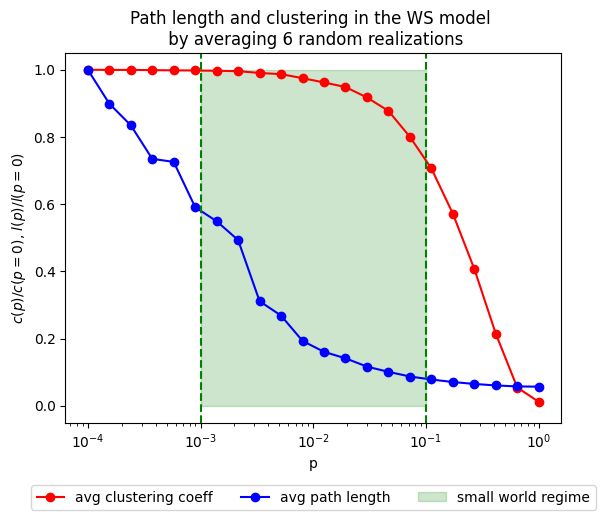

In [94]:
fig_cl, ax_cl = plt.subplots()

# Plot average clustering coefficient and average path length
ax_cl.plot(probabilities, mean_clusterings, marker='o', ls='-', color='red', label='avg clustering coeff')
ax_cl.plot(probabilities, mean_paths , marker='o', ls='-', color='blue', label='avg path length')

# Set the x-axis to a logarithmic scale
ax_cl.set_xscale('log')

# Set labels
ax_cl.set_xlabel('p')
ax_cl.set_ylabel(r'$c(p) / c(p=0)$, $l(p) / l(p=0)$')


# Add vertical lines at 10^-3 and 10^-1
ax_cl.axvline(x=1e-3, color='green', linestyle='--')
ax_cl.axvline(x=1e-1, color='green', linestyle='--')

# Fill the area between the lines with green
ax_cl.fill_between([1e-3, 1e-1], 0, 1, color='green', alpha=0.2, label = "small world regime")

ax_cl.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title("Path length and clustering in the WS model \n by averaging 6 random realizations")
plt.show()
